# 네이버 금용
Pandas 를 활용한 크롤링

In [2]:
# DataFrame : 행 x 열 ==> HTML <table> ~ </table>

In [3]:
# https://finance.naver.com

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

%matplotlib inline

In [5]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [7]:
# 일별시세
url = 'https://finance.naver.com/item/sise.nhn?code=005930'  # 삼성전자

In [10]:
#pandas.read_heml() 하면
# html 문서 안의 <table> 을 죄다 DataFrame 으로 담아서
# DataFrame 리스트로 리턴

dfs = pd.read_html(url, encoding='euc-kr')

In [11]:
dfs[0]

,0,1,2
0,"전일 80,100 80,100","고가 80,30080,300 (상한가 104,000104,000 )","거래량 1,031,372 1,031,372"
1,"시가 80,30080,300","저가 79,70079,700 (하한가 56,100 )","거래대금 82,525 82,525 백만"


In [12]:
dfs[1]

,0,1,2,3
0,현재가,79700,매도호가,80400
1,전일대비,하락 400,매수호가,80300
2,등락률(%),-0.50%,전일가,80100
3,거래량,1031372,시가,80300
4,거래대금(백만),82525,고가,80300
5,액면가,100원,저가,79700
6,NaN,NaN,NaN,NaN
7,상한가,104000,전일상한,103000
8,하한가,56100,전일하한,55800
9,PER,19.14,EPS,4165


In [13]:
dfs[2]

,매도잔량,매도호가,Unnamed: 2,매수호가,매수잔량
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,69908.0,80600.0,NaN,NaN,NaN
4,33742.0,80500.0,NaN,NaN,NaN
5,34365.0,80400.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,80300.0,3986.0


In [14]:
len(dfs)

12

In [15]:
dfs[8]

,0,1
0,동일업종 PER,18.21배
1,동일업종 등락률,-0.44%


In [16]:
#dfs[0]~부터 하나씩 출력해보면서 확인해보는 수밖에 없다
# 그런데, 안보인다. 알고보니 <iframe>
# <iframe> 의 url 을 브라우저에서 볼수 있는지 확인해보면 바로 긁어 올수 있다


# 페이징 url 확인해보려면, 아래 페이징 url 위에서 주소 확인해보자
#  https://finance.naver.com/item/sise_day.nhn?code=005930&page=3
#  ↑ page parameter 사용하고 있슴을 알수 있다.

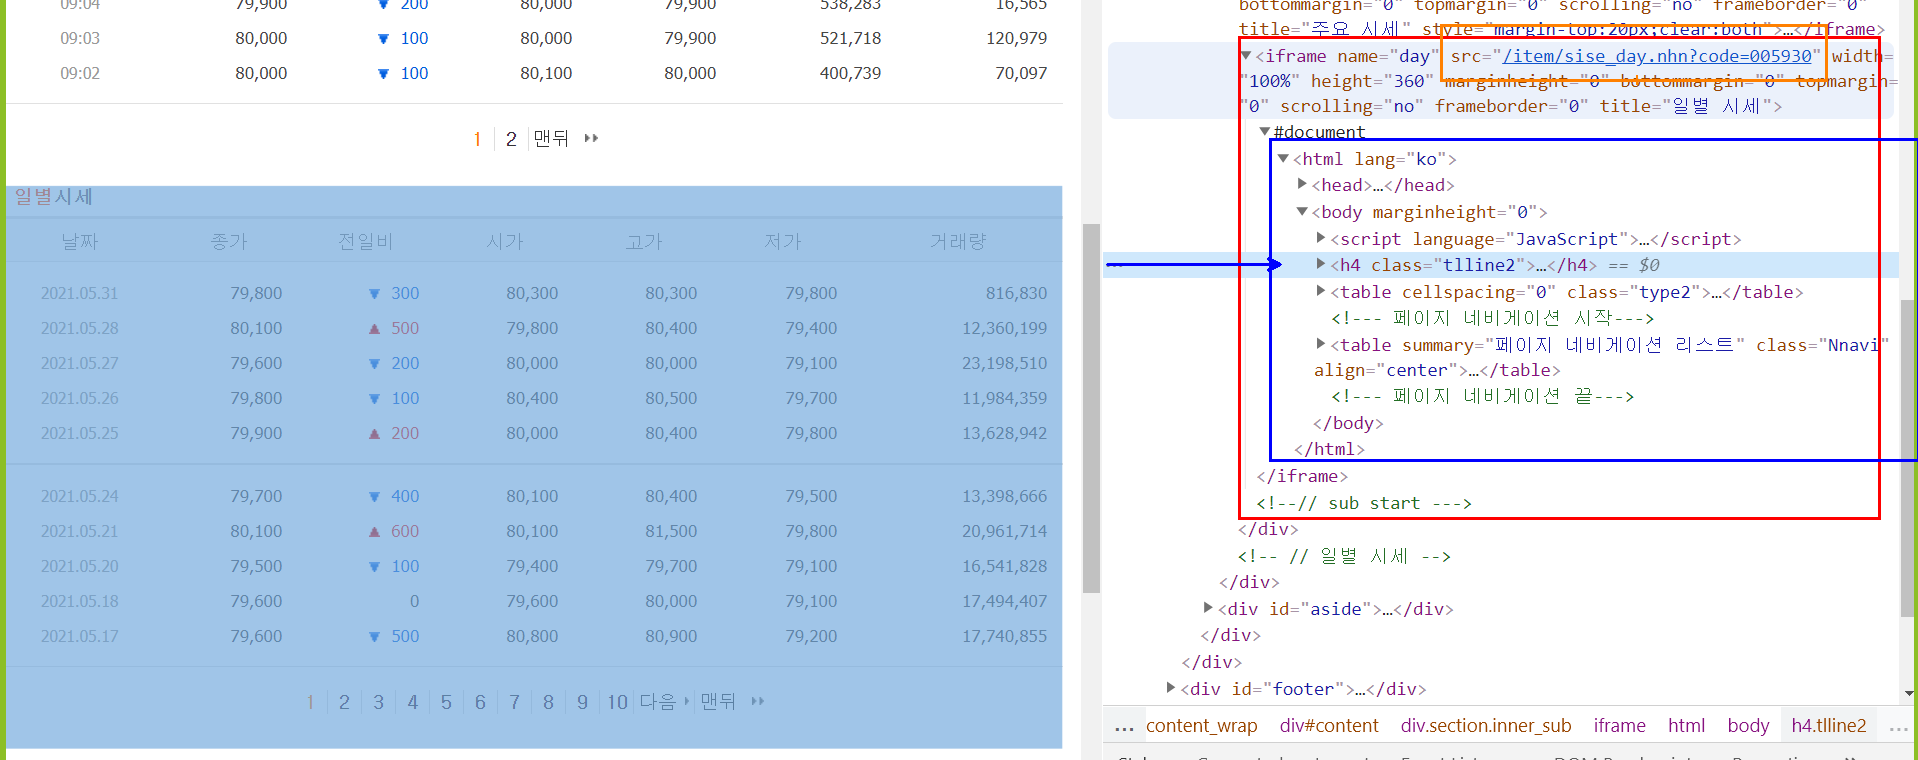

In [24]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=5'

headers = {
    'referer' : 'https://finance.naver.com'
}

response = requests.get(url, headers=headers)
response

# pd.read_html(url)

dfs = pd.read_html(response.text)  # html 문자열


In [27]:
df = dfs[0]
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.04.01,82900.0,1500.0,82500.0,83000.0,82000.0,18676461.0
2,2021.03.31,81400.0,800.0,82400.0,82700.0,81400.0,17240518.0
3,2021.03.30,82200.0,600.0,81600.0,82300.0,81300.0,13121698.0
4,2021.03.29,81600.0,100.0,81700.0,81700.0,81000.0,14952134.0
5,2021.03.26,81500.0,300.0,81400.0,81600.0,81000.0,12845778.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021.03.25,81200.0,200.0,81000.0,82100.0,80800.0,14758826.0


#### dropna() : NaN 으로만 구성된 row  제거

In [28]:
df.dropna()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.04.01,82900.0,1500.0,82500.0,83000.0,82000.0,18676461.0
2,2021.03.31,81400.0,800.0,82400.0,82700.0,81400.0,17240518.0
3,2021.03.30,82200.0,600.0,81600.0,82300.0,81300.0,13121698.0
4,2021.03.29,81600.0,100.0,81700.0,81700.0,81000.0,14952134.0
5,2021.03.26,81500.0,300.0,81400.0,81600.0,81000.0,12845778.0
9,2021.03.25,81200.0,200.0,81000.0,82100.0,80800.0,14758826.0
10,2021.03.24,81000.0,800.0,81000.0,81600.0,80700.0,17926638.0
11,2021.03.23,81800.0,200.0,82600.0,82900.0,81800.0,13299907.0
12,2021.03.22,82000.0,100.0,82000.0,82300.0,81700.0,12670506.0
13,2021.03.19,81900.0,1000.0,82100.0,82500.0,81800.0,15869700.0


In [29]:
df = df.dropna()
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.04.01,82900.0,1500.0,82500.0,83000.0,82000.0,18676461.0
2,2021.03.31,81400.0,800.0,82400.0,82700.0,81400.0,17240518.0
3,2021.03.30,82200.0,600.0,81600.0,82300.0,81300.0,13121698.0
4,2021.03.29,81600.0,100.0,81700.0,81700.0,81000.0,14952134.0
5,2021.03.26,81500.0,300.0,81400.0,81600.0,81000.0,12845778.0
9,2021.03.25,81200.0,200.0,81000.0,82100.0,80800.0,14758826.0
10,2021.03.24,81000.0,800.0,81000.0,81600.0,80700.0,17926638.0
11,2021.03.23,81800.0,200.0,82600.0,82900.0,81800.0,13299907.0
12,2021.03.22,82000.0,100.0,82000.0,82300.0,81700.0,12670506.0
13,2021.03.19,81900.0,1000.0,82100.0,82500.0,81800.0,15869700.0


In [30]:
df.columns

Index(['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량'], dtype='object')

In [32]:
df.columns.name = 'Column Name'

In [33]:
df

Column Name,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.04.01,82900.0,1500.0,82500.0,83000.0,82000.0,18676461.0
2,2021.03.31,81400.0,800.0,82400.0,82700.0,81400.0,17240518.0
3,2021.03.30,82200.0,600.0,81600.0,82300.0,81300.0,13121698.0
4,2021.03.29,81600.0,100.0,81700.0,81700.0,81000.0,14952134.0
5,2021.03.26,81500.0,300.0,81400.0,81600.0,81000.0,12845778.0
9,2021.03.25,81200.0,200.0,81000.0,82100.0,80800.0,14758826.0
10,2021.03.24,81000.0,800.0,81000.0,81600.0,80700.0,17926638.0
11,2021.03.23,81800.0,200.0,82600.0,82900.0,81800.0,13299907.0
12,2021.03.22,82000.0,100.0,82000.0,82300.0,81700.0,12670506.0
13,2021.03.19,81900.0,1000.0,82100.0,82500.0,81800.0,15869700.0


In [34]:
df.index.name = 'Index Name'
df

Column Name,날짜,종가,전일비,시가,고가,저가,거래량
Index Name,,,,,,,
1,2021.04.01,82900.0,1500.0,82500.0,83000.0,82000.0,18676461.0
2,2021.03.31,81400.0,800.0,82400.0,82700.0,81400.0,17240518.0
3,2021.03.30,82200.0,600.0,81600.0,82300.0,81300.0,13121698.0
4,2021.03.29,81600.0,100.0,81700.0,81700.0,81000.0,14952134.0
5,2021.03.26,81500.0,300.0,81400.0,81600.0,81000.0,12845778.0
9,2021.03.25,81200.0,200.0,81000.0,82100.0,80800.0,14758826.0
10,2021.03.24,81000.0,800.0,81000.0,81600.0,80700.0,17926638.0
11,2021.03.23,81800.0,200.0,82600.0,82900.0,81800.0,13299907.0
12,2021.03.22,82000.0,100.0,82000.0,82300.0,81700.0,12670506.0


In [35]:
df.set_index('날짜')

Column Name,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2021.04.01,82900.0,1500.0,82500.0,83000.0,82000.0,18676461.0
2021.03.31,81400.0,800.0,82400.0,82700.0,81400.0,17240518.0
2021.03.30,82200.0,600.0,81600.0,82300.0,81300.0,13121698.0
2021.03.29,81600.0,100.0,81700.0,81700.0,81000.0,14952134.0
2021.03.26,81500.0,300.0,81400.0,81600.0,81000.0,12845778.0
2021.03.25,81200.0,200.0,81000.0,82100.0,80800.0,14758826.0
2021.03.24,81000.0,800.0,81000.0,81600.0,80700.0,17926638.0
2021.03.23,81800.0,200.0,82600.0,82900.0,81800.0,13299907.0
2021.03.22,82000.0,100.0,82000.0,82300.0,81700.0,12670506.0


In [38]:
df.transpose()

Index Name,1,2,3,4,5,9,10,11,12,13
Column Name,,,,,,,,,,
날짜,2021.04.01,2021.03.31,2021.03.30,2021.03.29,2021.03.26,2021.03.25,2021.03.24,2021.03.23,2021.03.22,2021.03.19
종가,82900,81400,82200,81600,81500,81200,81000,81800,82000,81900
전일비,1500,800,600,100,300,200,800,200,100,1000
시가,82500,82400,81600,81700,81400,81000,81000,82600,82000,82100
고가,83000,82700,82300,81700,81600,82100,81600,82900,82300,82500
저가,82000,81400,81300,81000,81000,80800,80700,81800,81700,81800
거래량,1.86765e+07,1.72405e+07,1.31217e+07,1.49521e+07,1.28458e+07,1.47588e+07,1.79266e+07,1.32999e+07,1.26705e+07,1.58697e+07


# DaraFrame 을 뽑는 함수
# 네이버 금융의 일별 시세 10개 페이지 분량 뽑아서 합치기

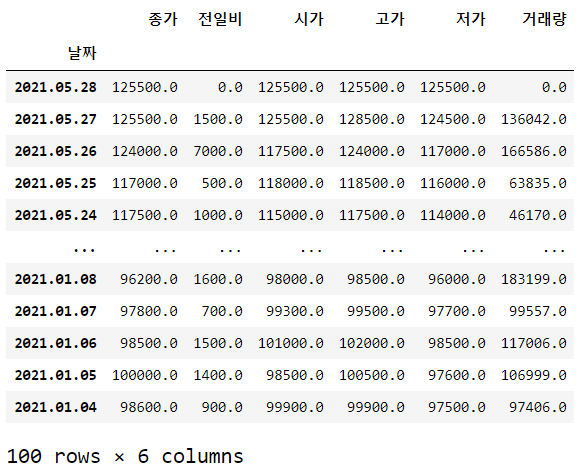

In [46]:
# 특정종목(code) 의 page 번째 <table> 을 읽어서 DataFrame 으로 리턴하는 함수 작성하고 
# 이를 활용하세요

# hint) pd.concat()


def get_daily_stock(code, page):
    url = f'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}' 
    
    headers = {
    'referer' : 'https://finance.naver.com'
    }

    response = requests.get(url, headers=headers)
    df = pd.read_html(response.text)[0]
    df.dropna(inplace=True)
    return df
    
get_daily_stock('005930', 3)

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.04.29,81700.0,400.0,82400.0,82500.0,81500.0,20000973.0
2,2021.04.28,82100.0,800.0,83200.0,83200.0,82100.0,15596759.0
3,2021.04.27,82900.0,600.0,83200.0,83300.0,82500.0,12941533.0
4,2021.04.26,83500.0,700.0,82900.0,83500.0,82600.0,15489938.0
5,2021.04.23,82800.0,400.0,81900.0,82900.0,81600.0,17805080.0
9,2021.04.22,82400.0,200.0,82900.0,83000.0,82400.0,13934746.0
10,2021.04.21,82600.0,1300.0,83300.0,83500.0,82500.0,21636079.0
11,2021.04.20,83900.0,600.0,83300.0,84000.0,83100.0,15521965.0
12,2021.04.19,83300.0,600.0,83800.0,84000.0,83300.0,15287311.0
13,2021.04.16,83900.0,200.0,84700.0,84700.0,83600.0,15429522.0


In [47]:
dfs = [
    get_daily_stock('005930', page)
    for page in range(1, 11)
]

In [51]:
dfs[9]

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.01.18,85000.0,3000.0,86600.0,87300.0,84100.0,43227951.0
2,2021.01.15,88000.0,1700.0,89800.0,91800.0,88000.0,33431809.0
3,2021.01.14,89700.0,0.0,88700.0,90000.0,88700.0,26393970.0
4,2021.01.13,89700.0,900.0,89800.0,91200.0,89100.0,36068848.0
5,2021.01.12,90600.0,400.0,90300.0,91400.0,87800.0,48682416.0
9,2021.01.11,91000.0,2200.0,90000.0,96800.0,89500.0,90306177.0
10,2021.01.08,88800.0,5900.0,83300.0,90000.0,83000.0,59013307.0
11,2021.01.07,82900.0,700.0,82800.0,84200.0,82700.0,32644642.0
12,2021.01.06,82200.0,1700.0,83300.0,84500.0,82100.0,42089013.0
13,2021.01.05,83900.0,900.0,81600.0,83900.0,81600.0,35335669.0


#### pd.concat(df1, df2 ...)
#### pd.concat(df list)

In [52]:
pd.concat(dfs)  # DataFrame 의 list 

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.05.31,79800.0,300.0,80300.0,80300.0,79600.0,3245908.0
2,2021.05.28,80100.0,500.0,79800.0,80400.0,79400.0,12360199.0
3,2021.05.27,79600.0,200.0,80000.0,80000.0,79100.0,23198510.0
4,2021.05.26,79800.0,100.0,80400.0,80500.0,79700.0,11984359.0
5,2021.05.25,79900.0,200.0,80000.0,80400.0,79800.0,13628942.0
...,...,...,...,...,...,...,...
9,2021.01.11,91000.0,2200.0,90000.0,96800.0,89500.0,90306177.0
10,2021.01.08,88800.0,5900.0,83300.0,90000.0,83000.0,59013307.0
11,2021.01.07,82900.0,700.0,82800.0,84200.0,82700.0,32644642.0
12,2021.01.06,82200.0,1700.0,83300.0,84500.0,82100.0,42089013.0


In [56]:
df_result = pd.concat(dfs).sort_values(by='날짜', ascending=False).set_index('날짜')
df_result

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2021.05.31,79800.0,300.0,80300.0,80300.0,79600.0,3245908.0
2021.05.28,80100.0,500.0,79800.0,80400.0,79400.0,12360199.0
2021.05.27,79600.0,200.0,80000.0,80000.0,79100.0,23198510.0
2021.05.26,79800.0,100.0,80400.0,80500.0,79700.0,11984359.0
2021.05.25,79900.0,200.0,80000.0,80400.0,79800.0,13628942.0
...,...,...,...,...,...,...
2021.01.11,91000.0,2200.0,90000.0,96800.0,89500.0,90306177.0
2021.01.08,88800.0,5900.0,83300.0,90000.0,83000.0,59013307.0
2021.01.07,82900.0,700.0,82800.0,84200.0,82700.0,32644642.0


<ipython-input-59-c2b8a5f91519>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_result.index, rotation=90, fontsize="small")


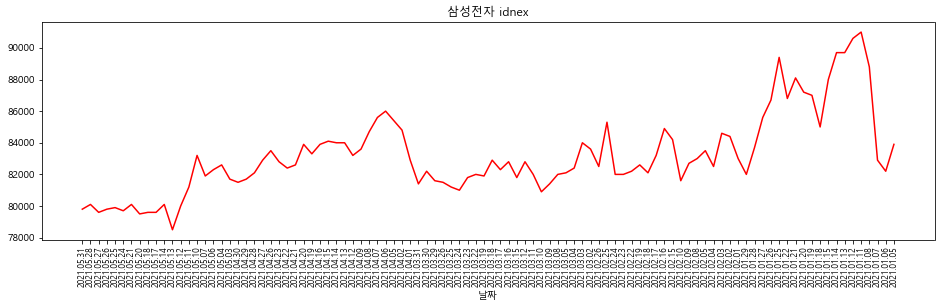

In [59]:
# line plot
x_val = df_result.index
y_val = df_result['종가']

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)

ax.set_xticklabels(df_result.index, rotation=90, fontsize="small")

ax.set_title('삼성전자 idnex')
ax.set_xlabel('날짜')

plt.plot(y_val, 'red')


# candle chart (봉차트)

![](https://ecodemy.cafe24.com/b1.jpg)
- 주가가 올랐을 때는 빨간색으로 그리고, 이것을 양봉이라고 합니다. 
- 주가가 내렸을 때는 파란색으로 그리고, 이것을 음봉이라고 합니다.


- 시가 : 아침에 주식시장이 문을 열고나서 처음 이루어진 거래가격
- 종가 : 주식시장이 문을 닫을 때의 가격.
- 최저가 : 하루 중 최저 가격.
- 최고가 : 하루 중 최고 가격

In [ ]:
# pip install mplfinance

# https://github.com/matplotlib/mplfinance

In [60]:
import mplfinance as mpf

In [61]:
df1 = df_result
df1

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2021.05.31,79800.0,300.0,80300.0,80300.0,79600.0,3245908.0
2021.05.28,80100.0,500.0,79800.0,80400.0,79400.0,12360199.0
2021.05.27,79600.0,200.0,80000.0,80000.0,79100.0,23198510.0
2021.05.26,79800.0,100.0,80400.0,80500.0,79700.0,11984359.0
2021.05.25,79900.0,200.0,80000.0,80400.0,79800.0,13628942.0
...,...,...,...,...,...,...
2021.01.11,91000.0,2200.0,90000.0,96800.0,89500.0,90306177.0
2021.01.08,88800.0,5900.0,83300.0,90000.0,83000.0,59013307.0
2021.01.07,82900.0,700.0,82800.0,84200.0,82700.0,32644642.0


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2021.05.31 to 2021.01.05
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      100 non-null    float64
 1   전일비     100 non-null    float64
 2   시가      100 non-null    float64
 3   고가      100 non-null    float64
 4   저가      100 non-null    float64
 5   거래량     100 non-null    float64
dtypes: float64(6)
memory usage: 5.5+ KB


In [65]:
df1.index.dtype

dtype('O')

In [66]:
# mplfinance  에서의 DataFrame 의 index  는 DateTimeindex 이어야 한다

In [67]:
pd.to_datetime(df1.index, infer_datetime_format=True)

DatetimeIndex(['2021-05-31', '2021-05-28', '2021-05-27', '2021-05-26',
               '2021-05-25', '2021-05-24', '2021-05-21', '2021-05-20',
               '2021-05-18', '2021-05-17', '2021-05-14', '2021-05-13',
               '2021-05-12', '2021-05-11', '2021-05-10', '2021-05-07',
               '2021-05-06', '2021-05-04', '2021-05-03', '2021-04-30',
               '2021-04-29', '2021-04-28', '2021-04-27', '2021-04-26',
               '2021-04-23', '2021-04-22', '2021-04-21', '2021-04-20',
               '2021-04-19', '2021-04-16', '2021-04-15', '2021-04-14',
               '2021-04-13', '2021-04-12', '2021-04-09', '2021-04-08',
               '2021-04-07', '2021-04-06', '2021-04-05', '2021-04-02',
               '2021-04-01', '2021-03-31', '2021-03-30', '2021-03-29',
               '2021-03-26', '2021-03-25', '2021-03-24', '2021-03-23',
               '2021-03-22', '2021-03-19', '2021-03-18', '2021-03-17',
               '2021-03-16', '2021-03-15', '2021-03-12', '2021-03-11',
      

In [68]:
df1.index = pd.to_datetime(df1.index, infer_datetime_format=True)

In [71]:
df1.rename(columns = {'종가':'Close', '시가':'Open', '고가':'High', '저가':'Low', '거래량':'Volume'}, inplace=True)
df1.index.name = 'Date'
df1

,Close,전일비,Open,High,Low,Volume
Date,,,,,,
2021-05-31,79800.0,300.0,80300.0,80300.0,79600.0,3245908.0
2021-05-28,80100.0,500.0,79800.0,80400.0,79400.0,12360199.0
2021-05-27,79600.0,200.0,80000.0,80000.0,79100.0,23198510.0
2021-05-26,79800.0,100.0,80400.0,80500.0,79700.0,11984359.0
2021-05-25,79900.0,200.0,80000.0,80400.0,79800.0,13628942.0
...,...,...,...,...,...,...
2021-01-11,91000.0,2200.0,90000.0,96800.0,89500.0,90306177.0
2021-01-08,88800.0,5900.0,83300.0,90000.0,83000.0,59013307.0
2021-01-07,82900.0,700.0,82800.0,84200.0,82700.0,32644642.0


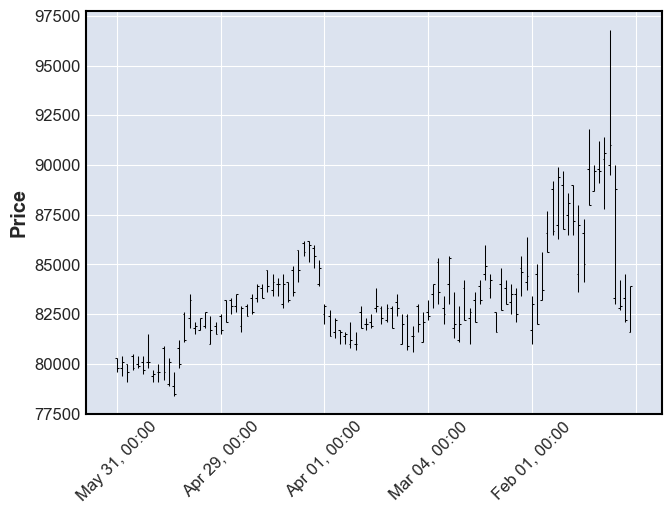

In [72]:
mpf.plot(df1)

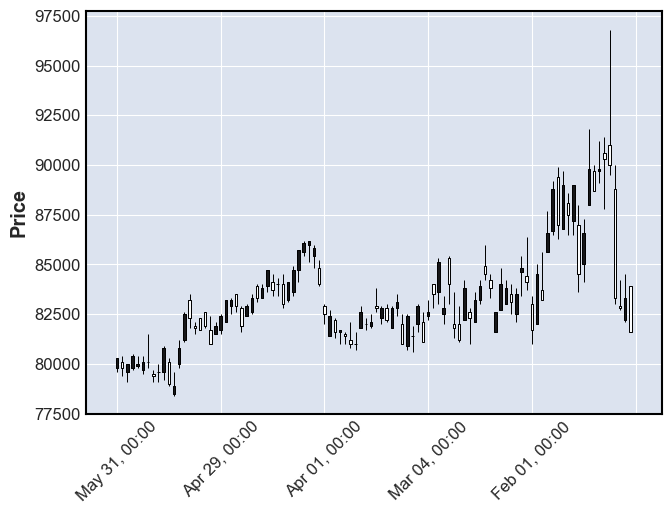

In [73]:
mpf.plot(df1, type='candle')

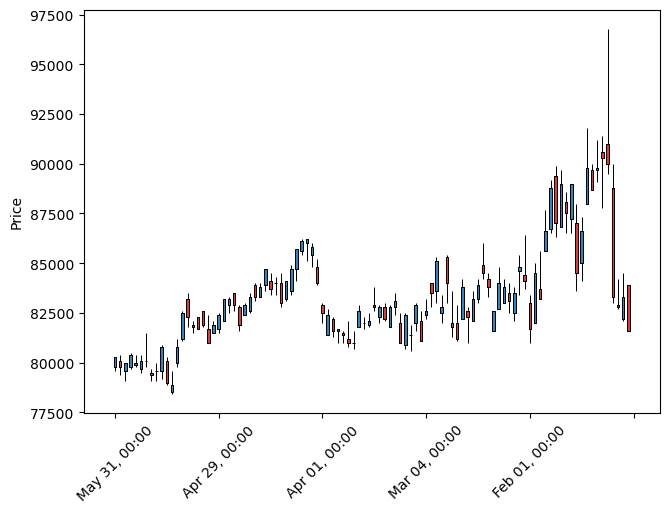

In [77]:
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors=colorset)
mpf.plot(df1, type='candle', style=s)

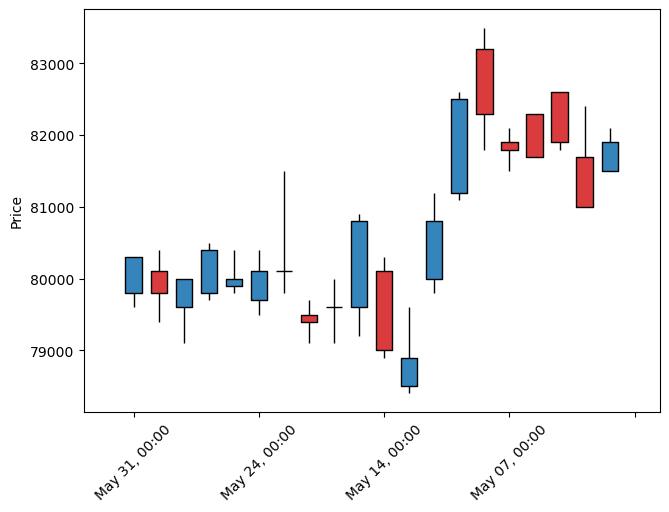

In [78]:
mpf.plot(df1.iloc[:20], type='candle', style=s)

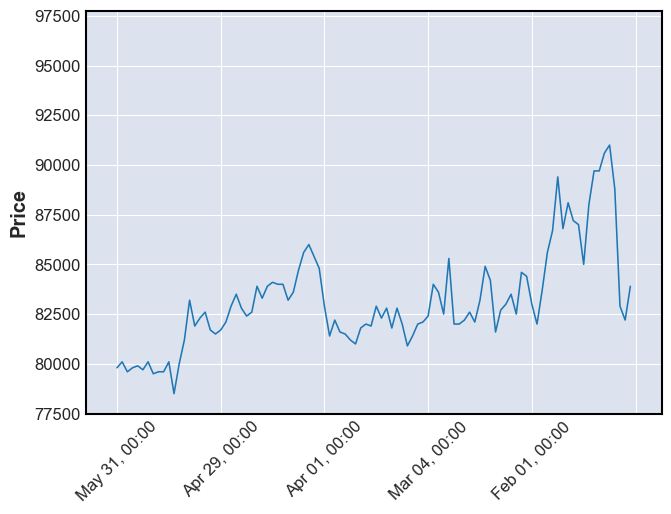

In [79]:
mpf.plot(df1, type='line')

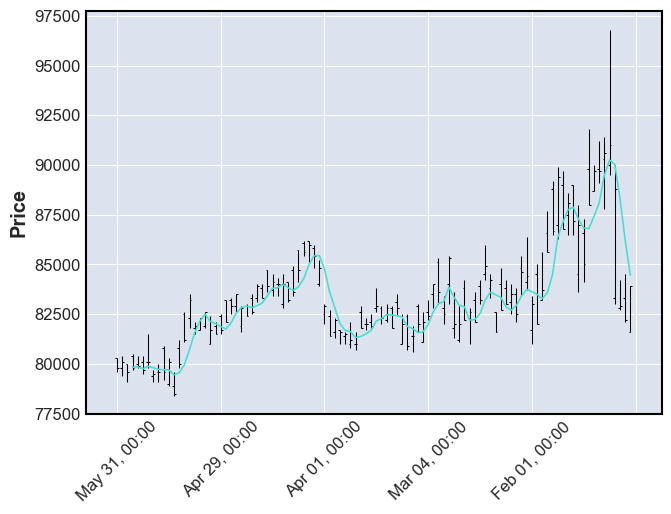

In [81]:
# 평균추이 가능
mpf.plot(df1, type='ohlc', mav=4)

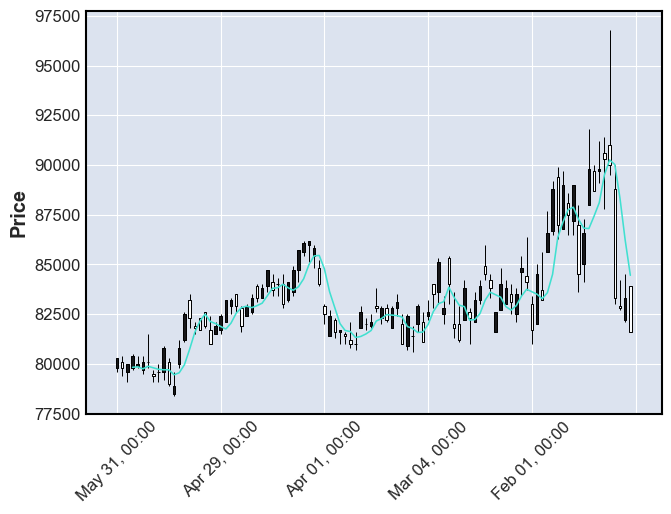

In [82]:
mpf.plot(df1, type='candle', mav=4)

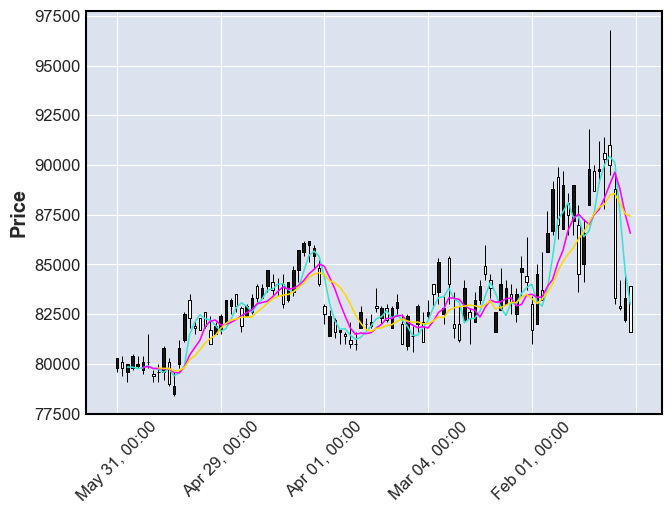

In [83]:
mpf.plot(df1, type='candle', mav=(3, 6, 9))

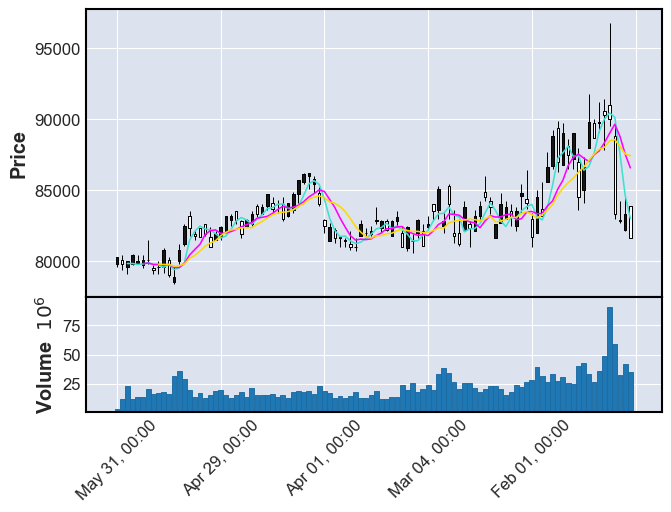

In [84]:
# 거래량 까지 확인
mpf.plot(df1, type='candle', mav=(3, 6, 9), volume=True)